## Cannys With Adaptive Simple

In [162]:
import cv2
import os
import json
import numpy as np

images_dir = './samples'
input = 'input.json'
output = 'output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
image_index = 3
# Load the image
original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))
original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)

# Resize the image
image = original_image.copy()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)
# adaptive thresholding
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 3)
#_,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

canny_image = image.copy()
cannys_found_contours = [] 

edges = cv2.Canny(thresh, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    
    if w*h > 400:
        contour_info = {
            'x': x,
            'y': y,
            'w': w,
            'h': h,
            'contour': contour 
        }
        cannys_found_contours.append(contour_info)

    
for found_contour in cannys_found_contours:
    x, y, w, h = found_contour['x'], found_contour['y'], found_contour['w'], found_contour['h']
    cv2.rectangle(canny_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    


cv2.imshow('Original Image', original_image)
cv2.imshow('Blur', blur)
cv2.imshow('Adaptive Thresholding', thresh)
cv2.imshow('Canny Edge Detection', canny_image)
cv2.imshow('Canny Corner Detection', edges)

cv2.waitKey(0)
cv2.destroyAllWindows()


## Blobs

In [160]:
import cv2
import os
import json
import numpy as np

images_dir = './samples'
input = 'input.json'
output = 'output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
image_index =2
# Load the image
original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))

# Resize the image
original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
image = original_image.copy()
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
grey = clahe.apply(grey)


detector = cv2.SimpleBlobDetector_create()

# Detect keypoints
keypoints = detector.detect(grey)

# Draw keypoints on the image
imgKeyPoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display found keypoints
cv2.imshow("Keypoints", imgKeyPoints)
cv2.imshow("Clahed Image", grey)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Segmentation with Watershed

In [222]:
import cv2
import os
import json
import numpy as np
images_dir = './samples'
input = 'input.json'
output = 'output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
image_index =0
# Load the image
original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))

# Resize the image
original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
image = original_image.copy()
# Convert the image to grayscale
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
grey = clahe.apply(grey)


# Apply adaptive thresholding to obtain a binary image
adaptive_thresh = cv2.adaptiveThreshold(grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological operations to remove noise and improve contours
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=2)

# Find contours of the lego pieces
contours, _ = cv2.findContours(sure_bg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a marker image with different labels for each lego piece
markers = np.zeros_like(sure_bg, dtype=np.int32)
for i, contour in enumerate(contours):
    cv2.drawContours(markers, [contour], 0, i+1, -1)

# Apply watershed algorithm
cv2.watershed(image, markers)


# Overlay the segmented lego pieces on the original image
image[markers == -1] = [0, 0, 255]  # Mark the boundaries with red color

# Put a rectangle around each lego piece
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow('Segmented Lego Pieces', image)
cv2.imshow('Clahe', grey)
cv2.imshow('Original Image', original_image)
cv2.imshow('Morphological Opening', opening)
cv2.imshow('Sure Background', sure_bg)


cv2.waitKey(0)
cv2.destroyAllWindows()


## Background Medium Simple

In [3]:
import cv2
import os
import json
import numpy as np

images_dir = './samples'
input = 'input.json'
output = 'output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
image_index = 49
# Load the image
original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))

# Resize the image
original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
image = original_image.copy()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Flatten the HSV image to a 1D array
hsv_flattened = hsv.reshape((-1, 3))

# Mask out non-zero pixels (non-black pixels)
hsv_flattened = hsv_flattened[hsv_flattened[:, 2] > 0]

# Calculate the median color (background) in the image
background_color = np.median(hsv_flattened, axis=0)
print(background_color)
tolerance = 110
lower_limit_0 = max(background_color[0] - tolerance,0)
upper_limit_0 = background_color[0] + tolerance
lower_limit_1 = max(background_color[1] - tolerance,0)
upper_limit_1 = background_color[1] + tolerance
lower_limit_2 = max(background_color[2] - tolerance,0)
upper_limit_2 = background_color[2] + tolerance

lower_background = np.array([lower_limit_0, lower_limit_1, lower_limit_2])
upper_background = np.array([upper_limit_0, upper_limit_1, upper_limit_2])


blur = cv2.GaussianBlur(hsv, (9, 9), 0)
grey_mask = cv2.inRange(blur, lower_background, upper_background)

non_grey_mask = cv2.bitwise_not(grey_mask)

result = cv2.bitwise_and(image, image, mask=non_grey_mask)

contours, _ = cv2.findContours(non_grey_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if(w*h < 400):
        continue
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow('Mask OG', grey_mask)
cv2.imshow('Mask', non_grey_mask)
cv2.imshow('hsv', hsv)
cv2.imshow('blur', blur)
cv2.imshow('Segmented LEGO pieces', image)

cv2.waitKey(0)
cv2.destroyAllWindows()


[ 19.  79. 171.]


## Cannys Brute

In [2]:
import cv2
import os
import json
import numpy as np
def load_json(filename):
        with open(filename) as f:
            return json.load(f)
images_dir = './samples'
input = 'input.json'
canny_output = 'canny_output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
for canny_low in range(50, 600, 100):
    for canny_high in range(canny_low+50, 700,  100):
        for thresh_c in range(5,8,1):
            for thresh_block_size in range(9, 14, 2):
                for kernel_size in range(9, 14, 2):
                    results = []
                    for image_index in range(len(image_paths)):
                        contours_list = []
                        original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))

                        # Resize the image
                        original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
                        image = original_image.copy()

                        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                        gray = clahe.apply(gray)
                        blur = cv2.GaussianBlur(gray, (kernel_size,kernel_size), 0)
                        thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, thresh_block_size, thresh_c)
                        #_,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

                        canny_image = image.copy()
                        cannys_found_contours = [] 

                        edges = cv2.Canny(thresh, canny_low, canny_high)
                        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                        for contour in contours:
                            x, y, w, h = cv2.boundingRect(contour)
                            
                            if w*h > 400:
                                contour_info = {
                                    'x': x,
                                    'y': y,
                                    'w': w,
                                    'h': h,
                                    'contour': contour 
                                }
                                cannys_found_contours.append(contour_info)
                                        
                        img_info = {
                                "file_name": image_paths[image_index],
                                "num_colors": len(cannys_found_contours),
                                "num_detections": len(cannys_found_contours),
                                "detected_objects": []  
                        }
                        results.append(img_info)    
                    output = {
                        "results": results
                    }
                    with open(f'outputs/canny_adaptative_{thresh_c}_{thresh_block_size}_{kernel_size}_{canny_low}_{canny_high}.json', 'w') as json_file:
                        json.dump(output, json_file, indent=4)


                    output_data = load_json(f'outputs/canny_adaptative_{thresh_c}_{thresh_block_size}_{kernel_size}_{canny_low}_{canny_high}.json')
                    solutions_data = load_json('solutions.json')

                    solutions_dict = {item['file_name']: item for item in solutions_data['results']}
                    passed_tests = 0
                    wrong_blocks = 0
                    all_blocks = 0
                    detected_blocks = 0
                    total_tests = len(output_data['results'])

                    for file in output_data['results']:
                        file_name = file['file_name']
                        
                        if file_name in solutions_dict:
                            same_colors = file['num_colors'] == solutions_dict[file_name]['num_colors']
                            same_detections = file['num_detections'] == solutions_dict[file_name]['num_detections']
                            all_blocks += solutions_dict[file_name]['num_detections']
                            detected_blocks += file['num_detections']
                            wrong_blocks += abs(file['num_detections'] - solutions_dict[file_name]['num_detections'])
                            if (same_detections):
                                passed_tests += 1
                                # print(f"[PASS] {file_name}")
                            else:
                                pass
                                # print(f"[FAIL] {file_name} - {file['num_detections']} detections, expected {solutions_dict[file_name]['num_detections']} detections")
                        else:
                            total_tests -= 1
                            print(f"{file_name}: Not found in solutions")

                    print(f"\n[SCORE] {passed_tests}/{total_tests} with {wrong_blocks} wrong blocks and {detected_blocks} detected blocks of a total of {all_blocks} blocks, with threshold c {thresh_c}, threshold block size {thresh_block_size}, kernel size {kernel_size} and canny low {canny_low} and canny high {canny_high}")

            




[SCORE] 1/50 with 493 wrong blocks and 796 detected blocks of a total of 307 blocks, with threshold c 5, threshold block size 9, kernel size 9 and canny low 50 and canny high 100

[SCORE] 4/50 with 295 wrong blocks and 582 detected blocks of a total of 307 blocks, with threshold c 5, threshold block size 9, kernel size 11 and canny low 50 and canny high 100

[SCORE] 11/50 with 161 wrong blocks and 378 detected blocks of a total of 307 blocks, with threshold c 5, threshold block size 9, kernel size 13 and canny low 50 and canny high 100

[SCORE] 1/50 with 714 wrong blocks and 1021 detected blocks of a total of 307 blocks, with threshold c 5, threshold block size 11, kernel size 9 and canny low 50 and canny high 100

[SCORE] 1/50 with 499 wrong blocks and 802 detected blocks of a total of 307 blocks, with threshold c 5, threshold block size 11, kernel size 11 and canny low 50 and canny high 100

[SCORE] 1/50 with 350 wrong blocks and 643 detected blocks of a total of 307 blocks, with th

## Background Medium Brute

In [7]:
import cv2
import os
import json
import numpy as np
def load_json(filename):
        with open(filename) as f:
            return json.load(f)
images_dir = './samples'
input = 'input.json'
canny_output = 'canny_output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
for area_threshold in range(300, 600, 100):
    for kernel_size in range(7, 21, 2):
        for tolerance in range(100, 120, 5):
            results = []

            for image_index in range(len(image_paths)):
                contours_list = []
                original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))

                # Resize the image
                original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
                image = original_image.copy()

                hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

                    # Flatten the HSV image to a 1D array
                hsv_flattened = hsv.reshape((-1, 3))

                # Mask out non-zero pixels (non-black pixels)
                hsv_flattened = hsv_flattened[hsv_flattened[:, 2] > 0]

                # Calculate the median color (background) in the image
                background_color = np.median(hsv_flattened, axis=0)
                lower_limit_0 = max(background_color[0] - tolerance,0)
                upper_limit_0 = min(background_color[0] + tolerance,255)
                lower_limit_1 = max(background_color[1] - tolerance,0)
                upper_limit_1 = min(background_color[1] + tolerance,255)
                lower_limit_2 = max(background_color[2] - tolerance,0)
                upper_limit_2 = min(background_color[2] + tolerance,255)

                lower_background = np.array([lower_limit_0, lower_limit_1, lower_limit_2])
                upper_background = np.array([upper_limit_0, upper_limit_1, upper_limit_2])


                blur = cv2.GaussianBlur(hsv, (kernel_size, kernel_size), 0)
                grey_mask = cv2.inRange(blur, lower_background, upper_background)

                non_grey_mask = cv2.bitwise_not(grey_mask)

                result = cv2.bitwise_and(image, image, mask=non_grey_mask)

                contours, _ = cv2.findContours(non_grey_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                for contour in contours:
                    x, y, w, h = cv2.boundingRect(contour)
                    if(w*h < area_threshold):
                        continue
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    contours_list.append(contour)

                img_info = {
                        "file_name": image_paths[image_index],
                        "num_colors": len(contours_list),
                        "num_detections": len(contours_list),
                        "detected_objects": []  
                }
                results.append(img_info)    
            output = {
                "results": results
            }
            with open(f'outputs/background_median_{tolerance}_{kernel_size}_{area_threshold}.json', 'w') as json_file:
                json.dump(output, json_file, indent=4)

            
            output_data = load_json(f'outputs/background_median_{tolerance}_{kernel_size}_{area_threshold}.json')
            solutions_data = load_json('solutions.json')

            solutions_dict = {item['file_name']: item for item in solutions_data['results']}
            passed_tests = 0
            wrong_blocks = 0
            all_blocks = 0
            total_tests = len(output_data['results'])

            for file in output_data['results']:
                file_name = file['file_name']
                
                if file_name in solutions_dict:
                    same_colors = file['num_colors'] == solutions_dict[file_name]['num_colors']
                    same_detections = file['num_detections'] == solutions_dict[file_name]['num_detections']
                    all_blocks += solutions_dict[file_name]['num_detections']
                    wrong_blocks += abs(file['num_detections'] - solutions_dict[file_name]['num_detections'])
                    if (same_detections):
                        passed_tests += 1
                       # print(f"[PASS] {file_name}")
                    else:
                        pass
                       # print(f"[FAIL] {file_name} - {file['num_detections']} detections, expected {solutions_dict[file_name]['num_detections']} detections")
                else:
                    total_tests -= 1
                    print(f"{file_name}: Not found in solutions")

            print(f"\n[SCORE] {passed_tests}/{total_tests} with {wrong_blocks} wrong blocks of a total of {all_blocks} blocks of tolerance {tolerance}, kernel size {kernel_size} and area threshold {area_threshold}")

    




[SCORE] 18/50 with 77 wrong blocks of a total of 307 blocks of tolerance 100, kernel size 7 and area threshold 300

[SCORE] 21/50 with 74 wrong blocks of a total of 307 blocks of tolerance 105, kernel size 7 and area threshold 300

[SCORE] 20/50 with 58 wrong blocks of a total of 307 blocks of tolerance 110, kernel size 7 and area threshold 300

[SCORE] 20/50 with 64 wrong blocks of a total of 307 blocks of tolerance 115, kernel size 7 and area threshold 300

[SCORE] 20/50 with 72 wrong blocks of a total of 307 blocks of tolerance 100, kernel size 9 and area threshold 300

[SCORE] 22/50 with 64 wrong blocks of a total of 307 blocks of tolerance 105, kernel size 9 and area threshold 300

[SCORE] 21/50 with 56 wrong blocks of a total of 307 blocks of tolerance 110, kernel size 9 and area threshold 300

[SCORE] 21/50 with 59 wrong blocks of a total of 307 blocks of tolerance 115, kernel size 9 and area threshold 300

[SCORE] 20/50 with 68 wrong blocks of a total of 307 blocks of toleranc

In [ ]:
import cv2
import os
import json
import numpy as np

images_dir = './samples'
input = 'input.json'
canny_output = 'canny_output.json'
results = []
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
for image_index in range(len(image_paths)):
    original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))

    # Resize the image
    original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
    image = original_image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny_image = image.copy()
    cannys_found_contours = [] 

    edges = cv2.Canny(blur, 30, 50)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        
        if area > 10:
            to_place = True
            cannys_found_contours_copy = cannys_found_contours.copy()
            for existing_contour_info in cannys_found_contours:
                existing_contour = existing_contour_info['contour']
                existing_x, existing_y, existing_w, existing_h = existing_contour_info['x'], existing_contour_info['y'], existing_contour_info['w'], existing_contour_info['h']
                
                intersect_x1 = max(x, existing_x)
                intersect_y1 = max(y, existing_y)
                intersect_x2 = min(x + w, existing_x + existing_w)
                intersect_y2 = min(y + h, existing_y + existing_h)
                intersect_area = max(0, intersect_x2 - intersect_x1) * max(0, intersect_y2 - intersect_y1)



                if intersect_area > 0:
                    if((w*h) > (existing_w * existing_h)):
                        cannys_found_contours_copy.remove(existing_contour_info)    
                    else:
                        to_place = False
                        break
                    

            if to_place:
                contour_info = {
                    'x': x,
                    'y': y,
                    'w': w,
                    'h': h,
                    'contour': contour 
                }

                cannys_found_contours_copy.append(contour_info)
                cannys_found_contours = cannys_found_contours_copy 

    img_info = {
        "file_name": image_paths[image_index],
        "num_colors": len(cannys_found_contours),
        "num_detections": len(cannys_found_contours),
        "detected_objects": []  
    }
    results.append(img_info)

output = {
    "results": results
}
with open(canny_output, 'w') as json_file:
    json.dump(output, json_file, indent=4)






In [60]:
import cv2
import os
import json
import numpy as np

# check if a box is inside another
def calculate_intersection_area(square1, square2):
    x1, y1, w1, h1 = square1
    x2, y2, w2, h2 = square2
    
    x_intersect = max(x1, x2)
    y_intersect = max(y1, y2)
    w_intersect = min(x1 + w1, x2 + w2) - x_intersect
    h_intersect = min(y1 + h1, y2 + h2) - y_intersect
    
    if w_intersect <= 0 or h_intersect <= 0:
        return 0
    
    intersection_area = w_intersect * h_intersect
    return intersection_area

def is_intersected(square1, square2):
    area_square1 = square1[2] * square1[3]  # area = width * height
    area_square2 = square2[2] * square2[3]
    area_intersection = calculate_intersection_area(square1, square2)
    
    ratio1 = area_intersection / area_square1
    ratio2 = area_intersection / area_square2
    
    if ratio1 > 0.6 and ratio1 > ratio2:
        return True
    else:
        return False


def canny_edges(gray):
    gaussian = cv2.GaussianBlur(gray, (7, 7), 0)
    canny = cv2.Canny(gaussian, 100, 200)
    return canny

def background_median(hsv):
    background_color = median_background(hsv)
    hue_tolerance = 20
    saturation_tolerance = 90
    value_tolerance = 90
    lower_background, upper_background = limits(background_color, hue_tolerance, saturation_tolerance, value_tolerance)
    blur = cv2.blur(hsv, (5, 5))
    gray_mask = cv2.inRange(blur, lower_background, upper_background)
    non_gray_mask = cv2.bitwise_not(gray_mask)
    non_gray_mask = cv2.erode(non_gray_mask, None, iterations=3)
    return non_gray_mask

def limits(background_color, hue_tolerance, saturation_tolerance, value_tolerance):
    lower_limit_0 = max(background_color[0] - hue_tolerance, 0)
    upper_limit_0 = min(background_color[0] + hue_tolerance, 180)
    lower_limit_1 = max(background_color[1] - saturation_tolerance, 0)
    upper_limit_1 = min(background_color[1] + saturation_tolerance, 255)
    lower_limit_2 = max(background_color[2] - value_tolerance, 0)
    upper_limit_2 = min(background_color[2] + value_tolerance, 255)
    lower_background = np.array([lower_limit_0, lower_limit_1, lower_limit_2])
    upper_background = np.array([upper_limit_0, upper_limit_1, upper_limit_2])
    return lower_background, upper_background

def median_background(hsv):
    hsv_flattened = hsv.reshape((-1, 3))
    hsv_flattened = hsv_flattened[hsv_flattened[:, 2] > 0]
    background_color = np.median(hsv_flattened, axis=0)
    return background_color

images_dir = './samples'
input = 'input.json'
canny_output = 'canny_output.json'
results = []
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
image_index = 13
original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))


original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
image = original_image.copy()
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
gray = gray_image.copy()
hsv = hsv_image.copy()

bg_median = background_median(hsv)
canny = canny_edges(gray)

combined_mask = cv2.bitwise_or(bg_median, canny)
result = cv2.bitwise_and(image, image, mask=combined_mask)

contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

removed = []
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    inside_other_box = False
    for j in range(i+1, len(contours)):
        prev_x, prev_y, prev_w, prev_h = cv2.boundingRect(contours[j])
        if is_intersected((x, y, w, h), (prev_x, prev_y, prev_w, prev_h)):
            inside_other_box = True
            break
        elif is_intersected((prev_x, prev_y, prev_w, prev_h),(x,y,w,h)):
            removed.append(j)
    if inside_other_box or w * h < 400:
        removed.append(i)

    
contours = [contour for i, contour in enumerate(contours) if i not in removed]
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
num_lego_pieces = len(contours)
print("Number of LEGO pieces detected:", num_lego_pieces)

cv2.imshow('Image', image)
cv2.imshow('Background median', bg_median)
cv2.imshow('Canny', canny)
cv2.imshow('Combined Mask', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of LEGO pieces detected: 9


In [70]:
import cv2
import os
import json
import numpy as np
def load_json(filename):
        with open(filename) as f:
            return json.load(f)
# check if a box is inside another
def calculate_intersection_area(square1, square2):
    x1, y1, w1, h1 = square1
    x2, y2, w2, h2 = square2
    
    x_intersect = max(x1, x2)
    y_intersect = max(y1, y2)
    w_intersect = min(x1 + w1, x2 + w2) - x_intersect
    h_intersect = min(y1 + h1, y2 + h2) - y_intersect
    
    if w_intersect <= 0 or h_intersect <= 0:
        return 0
    
    intersection_area = w_intersect * h_intersect
    return intersection_area

def is_intersected(square1, square2,ratio_threshold):
    area_square1 = square1[2] * square1[3]  # area = width * height
    area_square2 = square2[2] * square2[3]
    area_intersection = calculate_intersection_area(square1, square2)
    
    ratio1 = area_intersection / area_square1
    ratio2 = area_intersection / area_square2
    
    if ratio1 > ratio_threshold and ratio1 > ratio2:
        return True
    else:
        return False

def canny_edges(gray):
    gaussian = cv2.GaussianBlur(gray, (7, 7), 0)
    canny = cv2.Canny(gaussian, 100, 200)
    return canny

def background_median(hsv):
    background_color = median_background(hsv)
    hue_tolerance = 20
    saturation_tolerance = 90
    value_tolerance = 90
    lower_background, upper_background = limits(background_color, hue_tolerance, saturation_tolerance, value_tolerance)
    blur = cv2.blur(hsv, (5, 5))
    gray_mask = cv2.inRange(blur, lower_background, upper_background)
    non_gray_mask = cv2.bitwise_not(gray_mask)
    non_gray_mask = cv2.erode(non_gray_mask, None, iterations=3)
    return non_gray_mask

def limits(background_color, hue_tolerance, saturation_tolerance, value_tolerance):
    lower_limit_0 = max(background_color[0] - hue_tolerance, 0)
    upper_limit_0 = min(background_color[0] + hue_tolerance, 180)
    lower_limit_1 = max(background_color[1] - saturation_tolerance, 0)
    upper_limit_1 = min(background_color[1] + saturation_tolerance, 255)
    lower_limit_2 = max(background_color[2] - value_tolerance, 0)
    upper_limit_2 = min(background_color[2] + value_tolerance, 255)
    lower_background = np.array([lower_limit_0, lower_limit_1, lower_limit_2])
    upper_background = np.array([upper_limit_0, upper_limit_1, upper_limit_2])
    return lower_background, upper_background

def median_background(hsv):
    hsv_flattened = hsv.reshape((-1, 3))
    hsv_flattened = hsv_flattened[hsv_flattened[:, 2] > 0]
    background_color = np.median(hsv_flattened, axis=0)
    return background_color

images_dir = './samples'
input = 'input.json'
canny_output = 'canny_output.json'
with open(input, 'r') as json_file:
    data = json.load(json_file)

image_paths = data['image_files']
for ratio_threshold in np.arange(0.1, 1, 0.05):
    ratio_threshold = round(ratio_threshold, 2)
    results = []

    for image_index in range(len(image_paths)):
        original_image = cv2.imread(os.path.join(images_dir, image_paths[image_index]))


        original_image = cv2.resize(original_image, (0, 0), fx=0.15, fy=0.15)
        image = original_image.copy()
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

        hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
        gray = gray_image.copy()
        hsv = hsv_image.copy()

        bg_median = background_median(hsv)
        canny = canny_edges(gray)

        combined_mask = cv2.bitwise_or(bg_median, canny)
        result = cv2.bitwise_and(image, image, mask=combined_mask)

        contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        removed = []
        for i, contour in enumerate(contours):
            x, y, w, h = cv2.boundingRect(contour)
            inside_other_box = False
            for j in range(i+1, len(contours)):
                prev_x, prev_y, prev_w, prev_h = cv2.boundingRect(contours[j])
                if is_intersected((x, y, w, h), (prev_x, prev_y, prev_w, prev_h),ratio_threshold):
                    inside_other_box = True
                    break
                elif is_intersected((prev_x, prev_y, prev_w, prev_h),(x,y,w,h),ratio_threshold):
                    removed.append(j)
            if inside_other_box or w * h < 400:
                removed.append(i)

        contours = [contour for i, contour in enumerate(contours) if i not in removed]
        
        img_info = {
            "file_name": image_paths[image_index],
            "num_colors": len(contours),
            "num_detections": len(contours),
            "detected_objects": []  
        }
        results.append(img_info)

    output = {
        "results": results
    }
    with open(f"outputs/newtest_{ratio_threshold}.json", 'w') as json_file:
        json.dump(output, json_file, indent=4)

    output_data = load_json(f"outputs/newtest_{ratio_threshold}.json")
    solutions_data = load_json('solutions.json')

    solutions_dict = {item['file_name']: item for item in solutions_data['results']}
    passed_tests = 0
    falsepositive_blocks = 0
    falsenegatives_blocks = 0
    all_blocks = 0
    total_tests = len(output_data['results'])
    for file in output_data['results']:
        file_name = file['file_name']
        if file_name in solutions_dict:
            same_colors = file['num_colors'] == solutions_dict[file_name]['num_colors']
            same_detections = file['num_detections'] == solutions_dict[file_name]['num_detections']
            all_blocks += solutions_dict[file_name]['num_detections']
            wrong_blocks = file['num_detections'] - solutions_dict[file_name]['num_detections']
            if(wrong_blocks < 0):
                falsenegatives_blocks += abs(wrong_blocks)
            else:
                falsepositive_blocks += wrong_blocks
            if (same_detections):
                passed_tests += 1
                #print(f"[PASS] {file_name}")
            else:
                pass
                #print(f"[FAIL] {file_name} - {file['num_detections']} detections, expected {solutions_dict[file_name]['num_detections']} detections")
        else:
            total_tests -= 1
            print(f"{file_name}: Not found in solutions")

    print(f"\n[SCORE] {passed_tests}/{total_tests} with {falsepositive_blocks} false positive and {falsenegatives_blocks} false negative of a total of {all_blocks} blocks of ratio threshold {ratio_threshold}")

    



[SCORE] 22/50 with 16 false positive and 25 false negative of a total of 307 blocks of ratio threshold 0.1

[SCORE] 22/50 with 20 false positive and 20 false negative of a total of 307 blocks of ratio threshold 0.15

[SCORE] 22/50 with 22 false positive and 20 false negative of a total of 307 blocks of ratio threshold 0.2

[SCORE] 22/50 with 24 false positive and 18 false negative of a total of 307 blocks of ratio threshold 0.25

[SCORE] 23/50 with 26 false positive and 16 false negative of a total of 307 blocks of ratio threshold 0.3

[SCORE] 24/50 with 29 false positive and 15 false negative of a total of 307 blocks of ratio threshold 0.35

[SCORE] 24/50 with 30 false positive and 15 false negative of a total of 307 blocks of ratio threshold 0.4

[SCORE] 23/50 with 33 false positive and 15 false negative of a total of 307 blocks of ratio threshold 0.45

[SCORE] 23/50 with 36 false positive and 14 false negative of a total of 307 blocks of ratio threshold 0.5

[SCORE] 24/50 with 37 f

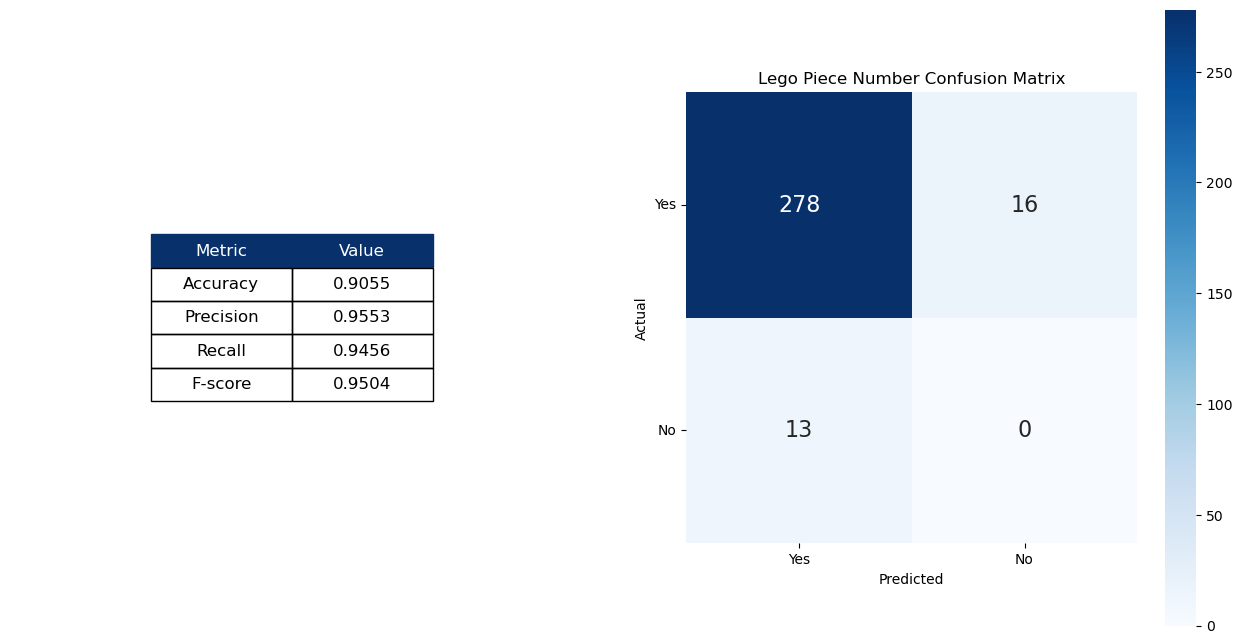

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the values
TP = 278
FP = 13
FN = 16
import pandas as pd
conf_matrix = np.array([[TP, FN],
                        [FP, 0]])

# Plot the confusion matrix
categories = ['Yes', 'No']
# Calculate the metrics
TN = 0  # True Negatives
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f_score = 2 * (precision * recall) / (precision + recall)

accuracy = round(accuracy, 4)
precision = round(precision, 4)
recall = round(recall, 4)
f_score = round(f_score, 4)

# Create a DataFrame for the metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F-score'],
    'Value': [accuracy, precision, recall, f_score]
})

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Create a subplot for the table
ax1 = plt.subplot(121)

# Remove the plot frame
ax1.axis('off')

# Create a table and add it to the plot
table = plt.table(cellText=metrics.values, colLabels=metrics.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # Increase the font size
table.scale(.5, 2)  # Increase the scale of the table

# Make the table's background invisible and set the color of the labels
for key, cell in table.get_celld().items():
    cell.set_facecolor('none')
    if key[0] == 0:  # If it's a label cell
        cell.set_color('#08306b')  # Set the color of the text to red
        cell.get_text().set_color('white')  # Set the color of the text to white

# Create a subplot for the confusion matrix
ax2 = plt.subplot(122, aspect='equal')  # Set the aspect ratio to 'equal'

# Plot the concfusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'], annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Lego Piece Number Confusion Matrix')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Yes', 'No'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Yes', 'No'], rotation=0)

# Show the plot
plt.show()